<a href="https://colab.research.google.com/github/amanverse/Machine-Learning-Models/blob/main/Titanic%20Survivor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Poblem Statement:- Take any dataset (in binary class) and prepare the model to solve the regression and prepare the model to solve the regression/classification problem. Write an analysis after changing the parameters (Hyper Parameter Tuning). 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


In [ ]:
# load dataq
data=pd.read_csv('titanic_pred.csv')
data.head()

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,1.0
3,895,0.0
4,896,0.0


In [ ]:
print(data.info)
print(data.shape)

<bound method DataFrame.info of      PassengerId  Survived
0            892       0.0
1            893       0.0
2            894       1.0
3            895       0.0
4            896       0.0
..           ...       ...
413         1305       0.0
414         1306       1.0
415         1307       0.0
416         1308       0.0
417         1309       0.0

[418 rows x 2 columns]>
(418, 2)


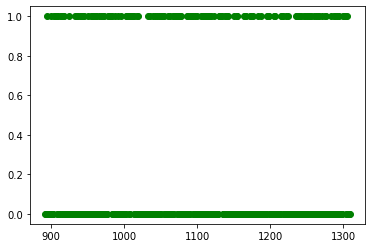

In [ ]:
% matplotlib inline
plt.scatter(data.PassengerId,data.Survived,color='green')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(data.PassengerId,data.Survived,test_size=0.9)
print('x train shape:',x_train.shape)
print('x test shape:',x_test.shape)
print('y train shape:',y_train.shape)
print('y test:',y_test.shape)

x train shape: (41,)
x test shape: (377,)
y train shape: (41,)
y test: (377,)


In [ ]:
# reshaping to 2D array
x_train=x_train.values.reshape(-1,1)
x_test=x_test.values.reshape(-1,1)

In [ ]:
x_train.shape

(41, 1)

In [ ]:
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression 
LG=LogisticRegression()
LG.fit(x_train,y_train)

LogisticRegression()

In [ ]:
pred=LG.predict(x_test)

In [ ]:
LG.score(x_test,y_test)

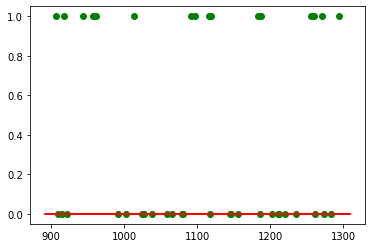

In [ ]:
plt.scatter(x_train,y_train,color='green')
plt.plot(x_test,pred,color='red')
plt.show()

In [ ]:
# hyper parameter grid
para_grid=[{'C' : np.logspace(-4,4,20),
             'max_iter': [100,1000,2500,5000],
            'penalty': ['l1','l2','elasticnet','none'],
            'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
}]

In [ ]:
#grid search
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression 

In [ ]:
LG1=LogisticRegression() 

In [ ]:
HT = GridSearchCV(LG1,param_grid=para_grid,cv=3,verbose=True,n_jobs=-1)

In [ ]:
best_ht=HT.fit(x_train,y_train)

In [ ]:
best_ht.best_estimator_

LogisticRegression(C=0.0001, penalty='l1', solver='liblinear')

In [ ]:
best_ht.score(x_test,y_test)

0.6604774535809018

The score of Logidtic Regression with defaul parameters is 0.5517241379310345
The score of Logistic Regression after hyperparameter tuning is 0.0.6604774535809018